**`=> importing the dependencies`**

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [194]:
df= pd.read_csv("CAR.csv")

In [195]:
# printin gfirst five rows
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [196]:
# check how many rows and columns are there
df.shape

(4340, 8)

In [197]:
 # getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [198]:
# check null value or not
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [199]:
df["owner"].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [200]:
df["seller_type"].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [201]:
print(df.fuel.value_counts())
print(df.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


**`=> encoding the categorical data`**

In [203]:
# replace the value with 0, 1, 2, 3, 4....
df.replace({"owner": {"First Owner": 0, "Second Owner": 1, "Third Owner": 2, "Fourth & Above Owner": 3, "Test Drive Car": 4}}, inplace= True)
df.replace({"seller_type": {"Individual": 0, "Dealer": 1, "Trustmark Dealer": 2}}, inplace= True)
df.replace({"fuel": {"Diesel": 0, "Petrol": 1, "CNG": 2, "LPG": 3, "Electric": 4}}, inplace= True)
df.replace({"transmission": {"Manual": 0, "Automatic": 1}}, inplace= True)

In [204]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0


**`=> splitting the data and target`**

In [206]:
X= df.drop(columns= ["name", "selling_price"], axis=1)
Y= df["selling_price"]

In [207]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [208]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


**`=> splitting train and test`**

In [210]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 42, test_size= 0.2)

In [211]:
print(X.shape, X_train.shape, X_test.shape)

(4340, 6) (3472, 6) (868, 6)


# linear regression
lin_r= LinearRegression()
lin_r.fit(X_train, Y_train)

**`=> 1. model training = linear regression`**

**`=> model evaluation`**

In [215]:
# predict the value
train_pred= lin_r.predict(X_train)

In [216]:
# r squared error
error= metrics.r2_score(Y_train, train_pred)
print(error)

0.46253898299314433


In [217]:
# mse 
error= metrics.mean_squared_error(Y_train, train_pred)
print(error)

183781070026.9859


**`=> visulize the actual price and predicted price`**

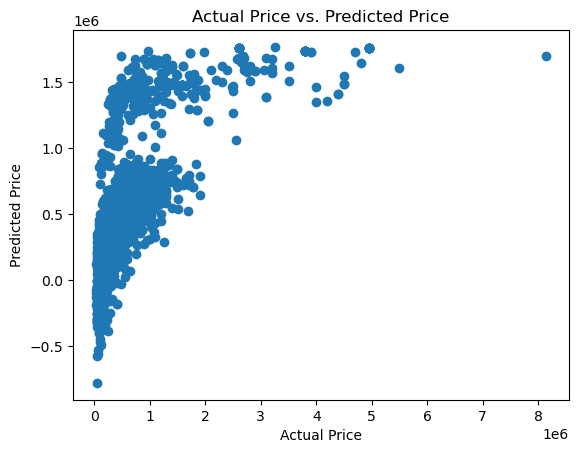

In [219]:
plt.scatter(Y_train, train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

In [220]:
# prediction on test data
test_pred= lin_r.predict(X_test)

In [221]:
# r squared error
error= metrics.r2_score(Y_test, test_pred)
print(error)

0.3982242700324048


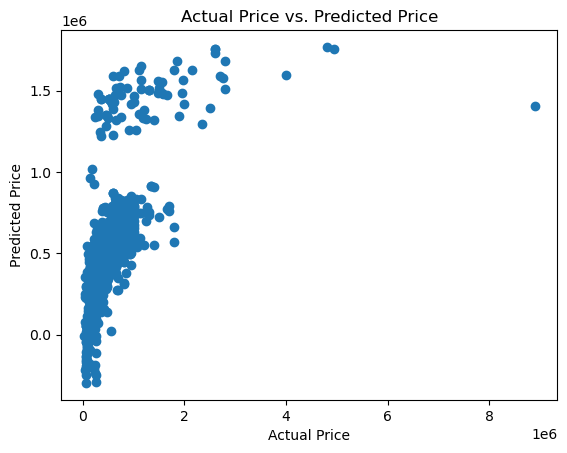

In [222]:
plt.scatter(Y_test, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

**`=> 2. model training = lasso regression`**

In [224]:
las_r= Lasso()
las_r.fit(X_train, Y_train)

Lasso()

**`=> model evaluation`**

In [226]:
# prediction on train data
train_pred1= las_r.predict(X_train)

In [283]:
# r squared error
error1= metrics.r2_score(Y_train, train_pred1)
print(error1)

0.46253898294356177


In [228]:
# prediction on test data
test_pred1= las_r.predict(X_test)

In [289]:
# r squared error
error11= metrics.r2_score(Y_test, test_pred1)
print(error11)

0.3982251048771134


**`=> visulization the actual price and predicted price`**

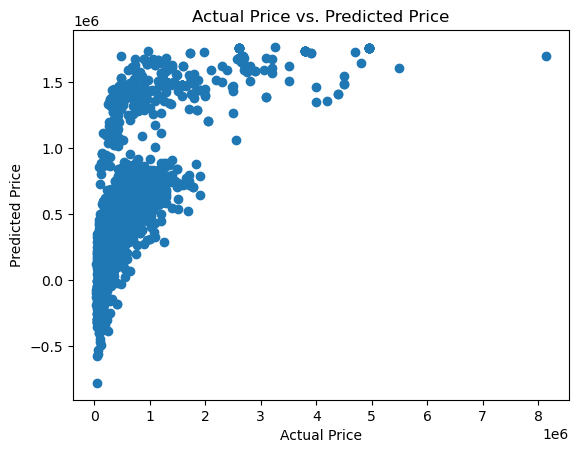

In [231]:
plt.scatter(Y_train, train_pred1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

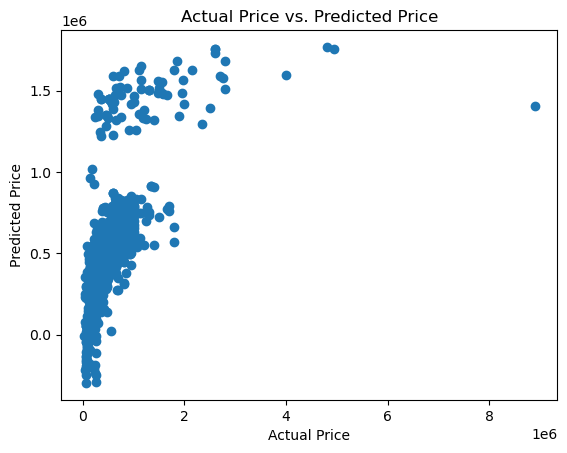

In [232]:
plt.scatter(Y_test, test_pred1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

**`=> 3. model training = XGBoost`**

In [234]:
xgb= XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**`=> model evaluation`**

In [236]:
# prediction on train data
train_pred2= xgb.predict(X_train)

In [285]:
# r squared error
error2= metrics.r2_score(Y_train, train_pred2)
print(error2)

0.9382802016742865


In [238]:
# prediction on test data
test_pred2= xgb.predict(X_test)

In [287]:
# r squared error
error22= metrics.r2_score(Y_test, test_pred2)
print(error22)

0.4942882472079293


**`=> visulization the actual price and predicted price`**

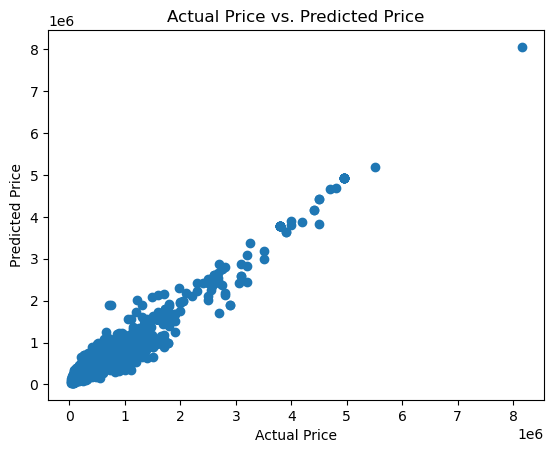

In [241]:
plt.scatter(Y_train, train_pred2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

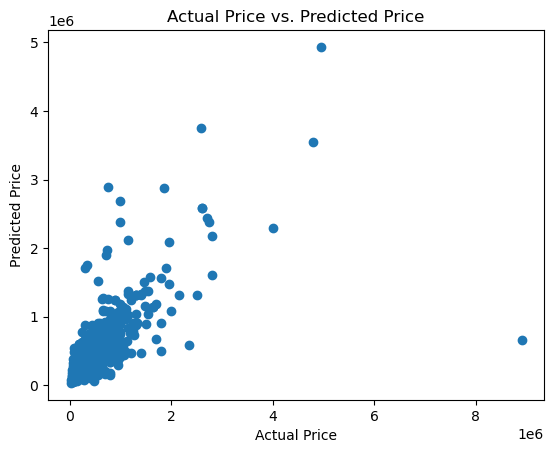

In [242]:
plt.scatter(Y_test, test_pred2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()